In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score

In [90]:
dataset = pd.read_csv("dataset/DATA_copy_columndevided.csv")

In [91]:
X = dataset.iloc[:, 1:32].values
y = dataset.iloc[:, 32].values

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [93]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
classifier = SVC()
classifier.fit(X_train,y_train)

SVC()

In [95]:
y_predict = classifier.predict(X_test)

In [96]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test, y_predict))

[[0 1 2 0 0 0 0 0]
 [0 6 1 0 0 0 0 0]
 [0 4 1 0 0 0 0 0]
 [0 3 0 0 0 1 0 0]
 [0 2 1 1 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 1]
 [0 0 0 2 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.32      0.86      0.46         7
           2       0.20      0.20      0.20         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2

    accuracy                           0.24        29
   macro avg       0.06      0.13      0.08        29
weighted avg       0.11      0.24      0.15        29



C:\Users\nethm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nethm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nethm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\nethm\AppData\Local\Temp\ipykernel_8880\4271519678.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\nethm\AppData\Local\Temp\ipykernel_8880\4271519678.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


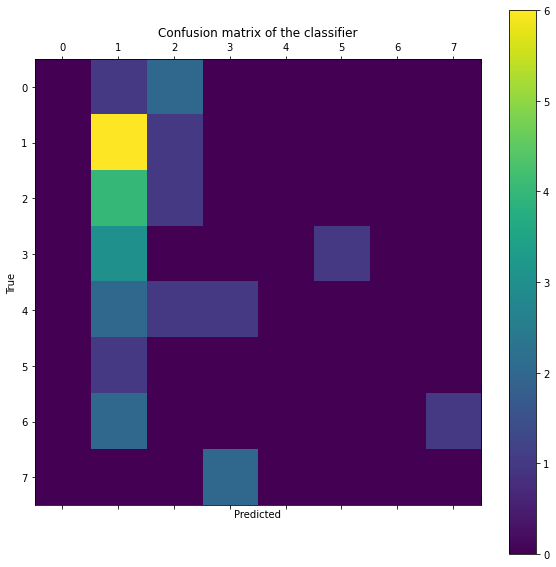

In [97]:
from sklearn.metrics import confusion_matrix

labels = ['0', '1', '2', '3', '4', '5', '6', '7']
cm = confusion_matrix(y_test, y_predict)
# print(cm)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [100]:
def get_metrics(y_test, y_predict):
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict, average='weighted')
    recall = recall_score(y_test, y_predict, average='weighted')
    f1 = f1_score(y_test, y_predict, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predict)

print("accuracy = %.2f%% \nprecision = %.2f%% \nrecall = %.2f%% \nf1 = %.2f%%" % (accuracy * 100, precision * 100, recall * 100, f1 * 100))

accuracy = 24.14% 
precision = 11.07% 
recall = 24.14% 
f1 = 14.59%


C:\Users\nethm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
import numpy as np

FP = confusion_matrix(y_test, y_predict).sum(axis=0) - np.diag(confusion_matrix(y_test, y_predict))  
FN = confusion_matrix(y_test, y_predict).sum(axis=1) - np.diag(confusion_matrix(y_test, y_predict)) 
TP = np.diag(confusion_matrix(y_test, y_predict)) 
TN = confusion_matrix(y_test, y_predict).sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print(TPR)
print(FPR)

[0.         0.85714286 0.2        0.         0.         0.
 0.         0.        ]
[0.         0.59090909 0.16666667 0.12       0.         0.03571429
 0.         0.03703704]


C:\Users\nethm\AppData\Local\Temp\ipykernel_8880\2024808462.py:13: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
C:\Users\nethm\AppData\Local\Temp\ipykernel_8880\2024808462.py:21: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)


In [99]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_


# from sklearn.naive_bayes import MultinomialNB
# classifier = MultinomialNB(alpha = 0.1)
# classifier.fit(x_train, y_train)

# y_pred = classifier.predict(x_test)
pred_prob = classifier.predict_proba(X_test)


from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

AttributeError: predict_proba is not available when  probability=False

In [ ]:
data = dataset.loc[:,['1','2','3','4','6','17','18','19','20','21','22','23','24','25','26','27','28','29','30']]
data

X1 = data.iloc[:, 0:17].values
y1 = data.iloc[:, 18].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.20)

scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

classifier = SVC()
classifier.fit(X1_train,y1_train)

y1_predict = classifier.predict(X1_test)

print(confusion_matrix(y1_test,y1_predict))
print(classification_report(y1_test, y1_predict))

from sklearn.metrics import confusion_matrix

labels = ['0', '1', '2', '3']
cm = confusion_matrix(y1_test, y1_predict)
# print(cm)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()